In [ ]:
import pandas as pd
import os                                                   # set current working directory 
import numpy as np                                          # ndarrays
import matplotlib.pyplot as plt                             # plotting
from scipy import stats                                     # summary stats
import matplotlib.axes as pl
import random
import math

In [ ]:
df= pd.read_csv('50layersreflectivity _1.csv')

In [ ]:
df=np.array(df)
df

In [ ]:
import numpy as np
def makeGaussian(size, bk, sigmak , center):
    y = np.arange(0, size, 1, int)
    z = y[:,np.newaxis]
    x = z[:,np.newaxis]

    zmax=np.max(z)
    if center is None:
        ck = dk = size // 2

    else:
        ck = center[0]
        dk = center[1]
    return 1.5*(z/zmax)*bk*np.exp(-((x-ck)**2 + (y-dk)**2) / 2 * sigmak**2)

In [ ]:
S2=makeGaussian(50,1,0.1 ,center=(25,25))

In [ ]:
S2.shape

(50, 50, 50)

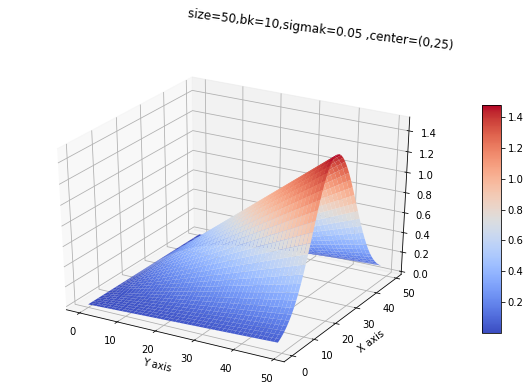

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111, projection='3d')


x = np.arange(0, 50, 1, int)
y = np.arange(0, 50, 1, int)

X,Y = np.meshgrid(x,y)

Z = S2

mycmap = plt.get_cmap('coolwarm')
ax1.set_title('size=50,bk=10,sigmak=0.05 ,center=(0,25)', loc='right', rotation=353)
ax1.set_xlabel('Y axis')
ax1.set_ylabel('X axis')
ax1.set_zlabel('')

surf1 = ax1.plot_surface(Y,X,Z, cmap=mycmap)
fig.colorbar(surf1, ax=ax1, shrink=0.7, aspect=12)

plt.show()

In [ ]:
df_n=np.zeros((50,50))
df_new=pd.DataFrame(df_n)

In [ ]:
df=pd.DataFrame(df)

In [ ]:
for z in range(50):
  for y in range(50):
    #b = random.uniform(-2.5, 2.5)
    Z=round(z+S2[y,z])
    df_new.loc[y,Z]=df.loc[y,z]

In [ ]:
df_new.to_csv('import_8.csv',index=False)